In [2]:
import sys
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

from tools.DataLoader import DataLoader
from tools.DataSet import DataSet
from tools.ModelTester import ModelTester
from models import Models
from tools.Metrics import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 8.0) # set default size of plots

%load_ext autoreload
%autoreload 2

In [3]:
dl = DataLoader("data/train.csv", class_col_name="species", excluded_features={"id"})
dl.load()
dataset = dl.get_dataset()

print(f"Number of data entries : {len(dataset)}")
print(f"Number of classes : {len(dataset.group_by_class())}")

grouppedClasses = pd.DataFrame(
    data=np.array([ len(ds) for ds in dataset.group_by_class() ]),
    columns=["Count"],
    index=[f"{dl.get_label_name(ds.labels[0])}" for ds in dataset.group_by_class()]
)
display(grouppedClasses)

dataset.shuffle()
train_set, test_set = dataset.stratified_split([0.7])
print(f"Train set : {len(train_set)} - Number of classes : {len(train_set.group_by_class())}")
print(f"Train set : {len(test_set)} - Number of classes : {len(test_set.group_by_class())}")

Number of data entries : 990
Number of classes : 99


,Count
Acer_Opalus,10
Pterocarya_Stenoptera,10
Quercus_Hartwissiana,10
Tilia_Tomentosa,10
Quercus_Variabilis,10
...,...
Ulmus_Bergmanniana,10
Quercus_Nigra,10
Salix_Intergra,10
Quercus_Infectoria_sub,10


Train set : 693 - Number of classes : 99
Train set : 297 - Number of classes : 99


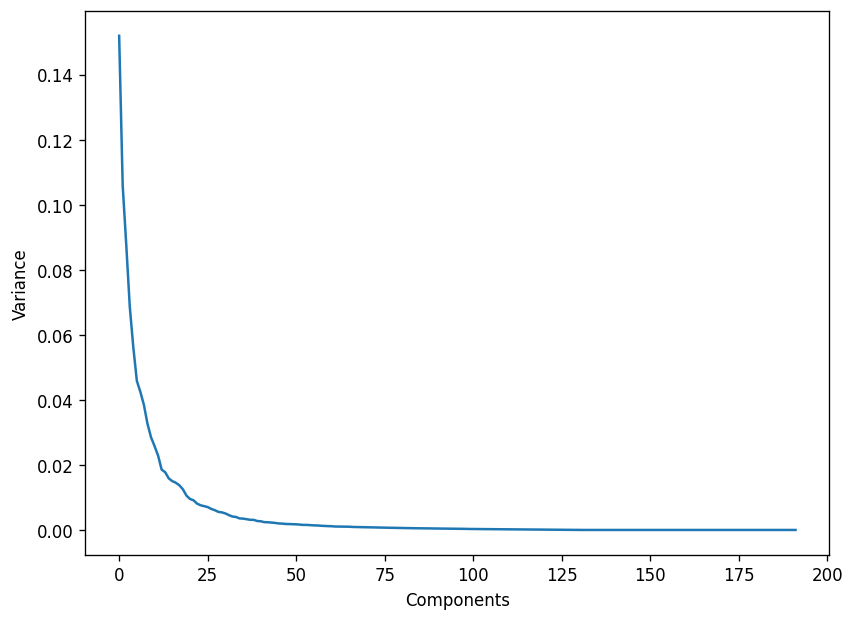

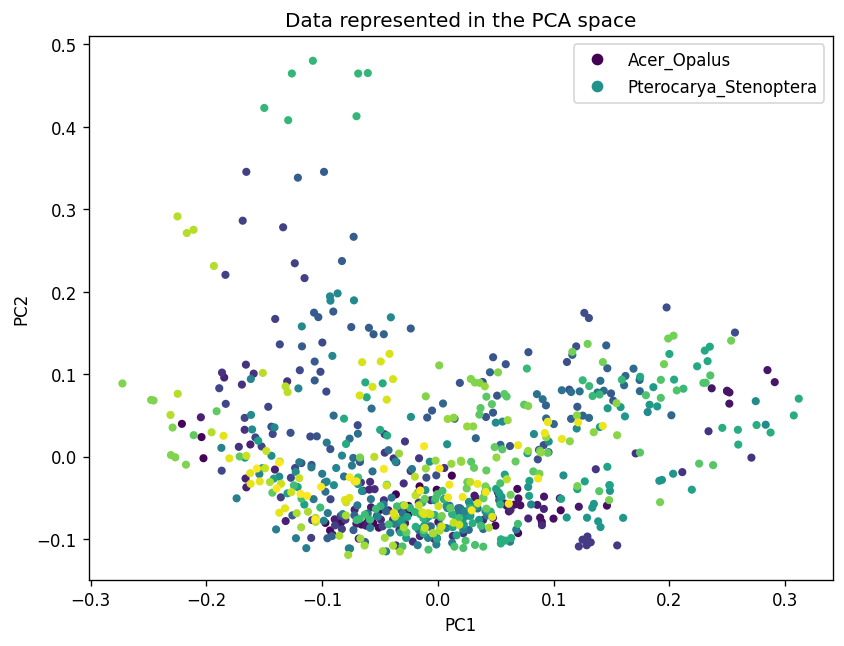

In [4]:
from sklearn.decomposition import PCA

# Project into the PCA space (2 major axis)
pca = PCA()
pcaSpace = pca.fit_transform(train_set.features)
pcaSpaceXY = (pcaSpace[:,0], pcaSpace[:,1])

# Plot PCA axis contributions
plt.figure(figsize=(8, 6), dpi=120)
plt.plot(pca.explained_variance_ratio_)
plt.ylabel("Variance")
plt.xlabel("Components")
plt.show()

# Plot data in the PCA space (2 major axis)
plt.figure(figsize=(8, 6), dpi=120)
plt.xlabel("PC1")
plt.ylabel("PC2")
scatter = plt.scatter(x=pcaSpaceXY[0], y=pcaSpaceXY[1], c=train_set.labels, s=15)
plt.legend(handles=scatter.legend_elements(num=3)[0], labels=dl.classes)
plt.title("Data represented in the PCA space", loc='center', wrap=True)
plt.show()

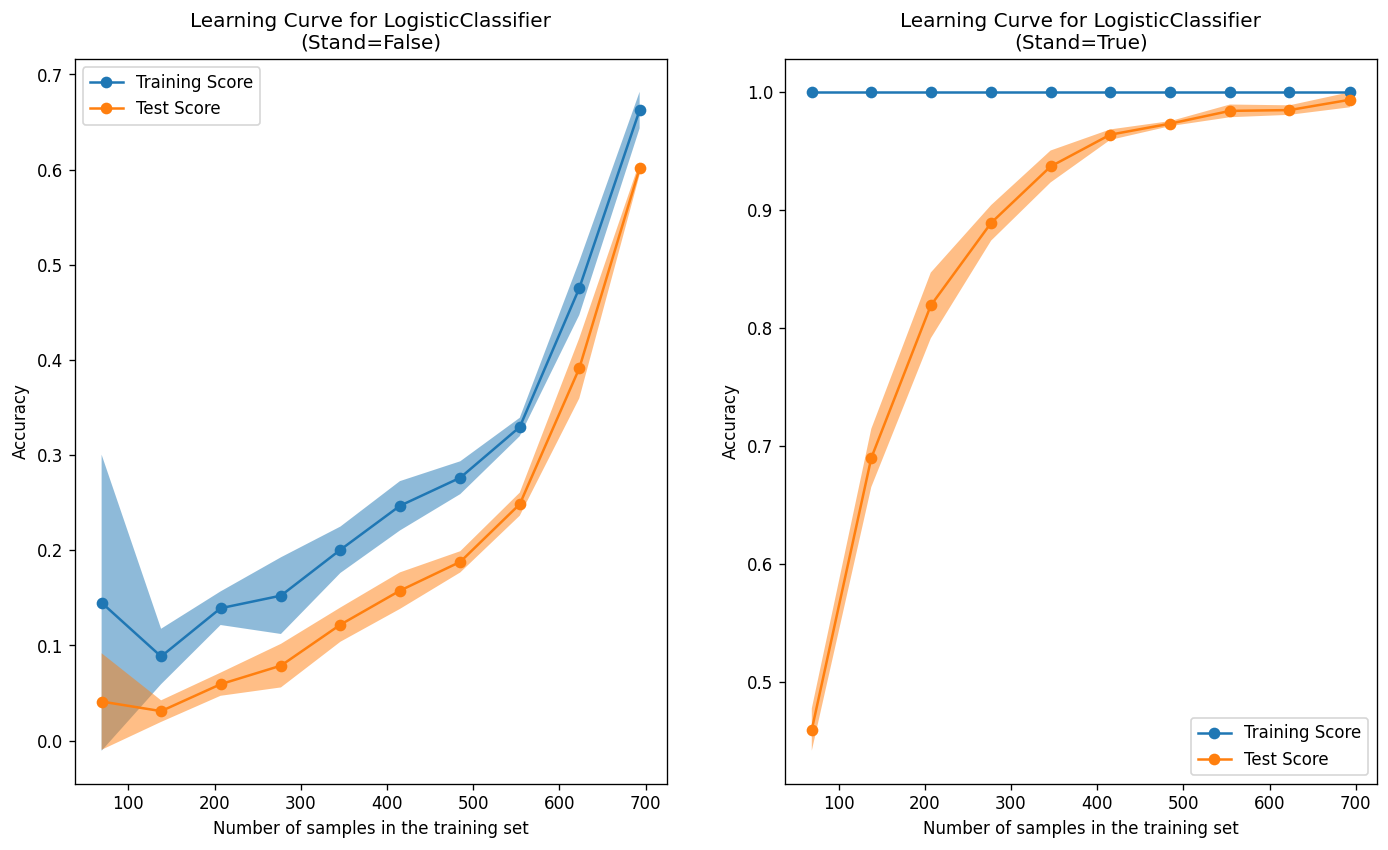

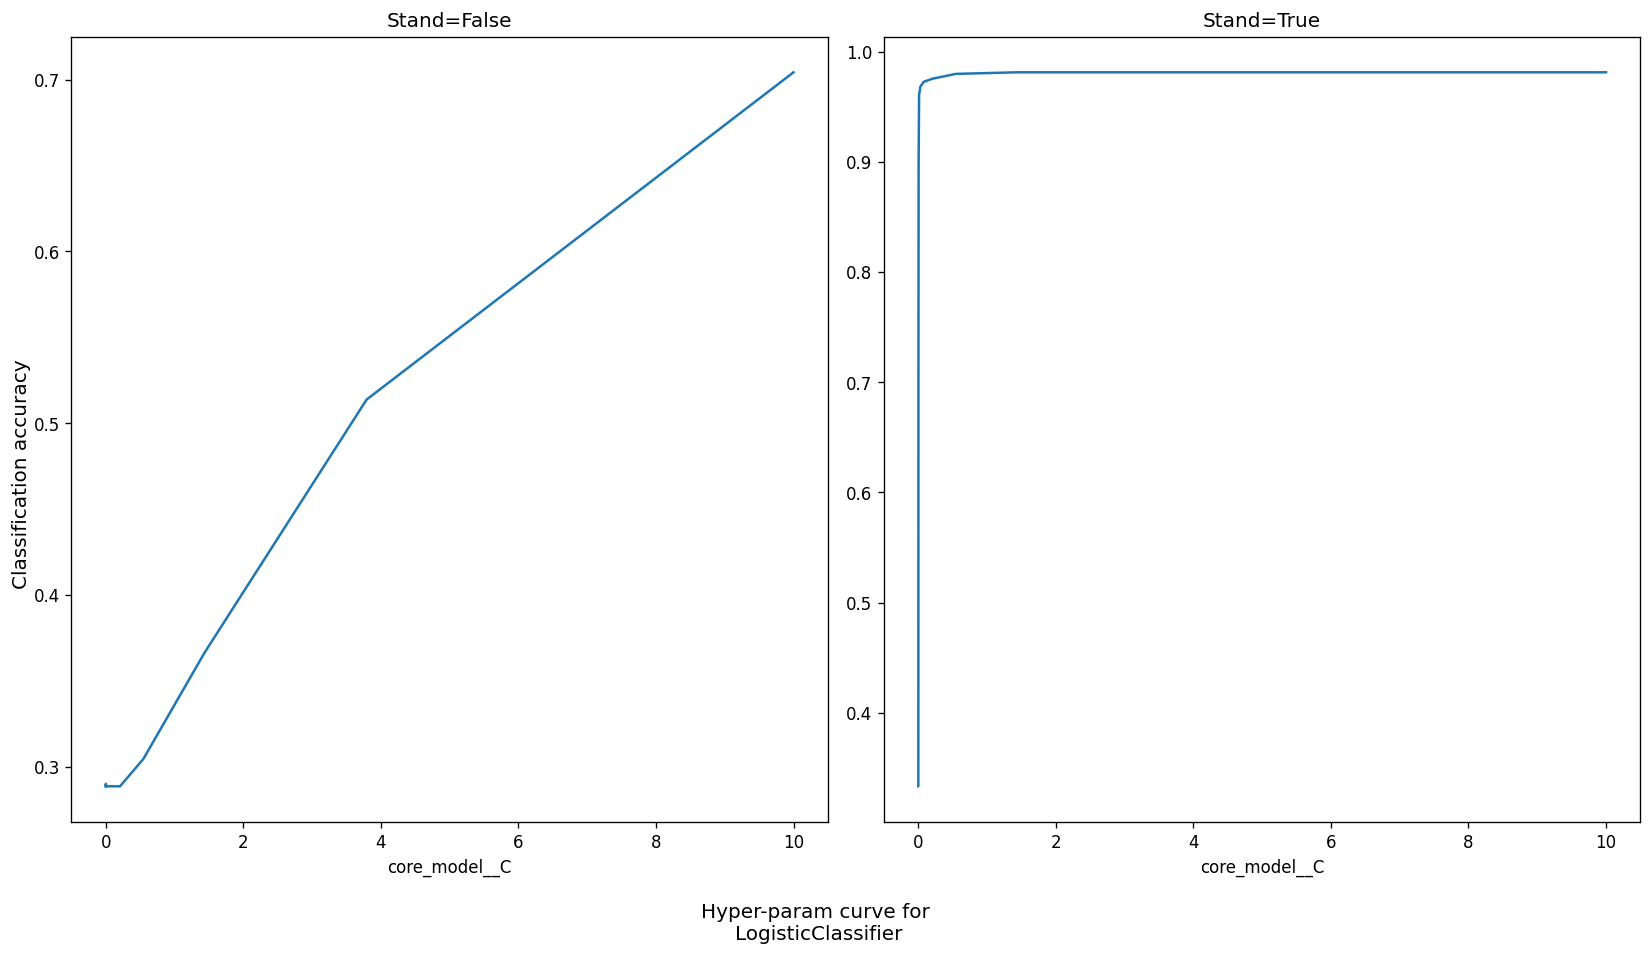

,[TRAIN] LogisticClassifier (Stand=False),[TEST] LogisticClassifier (Stand=False),[TRAIN] LogisticClassifier (Stand=True),[TEST] LogisticClassifier (Stand=True)
Accuracy,0.903319,0.794613,1.000000,0.986532
Precision,0.903319,0.794613,1.000000,0.986532
Recall,0.903319,0.794613,1.000000,0.986532
F1 Score,0.903319,0.794613,1.000000,0.986532
ROC AUC,0.998216,0.993506,1.000000,0.999977
Log loss,2.395974,2.533724,0.020495,0.110781


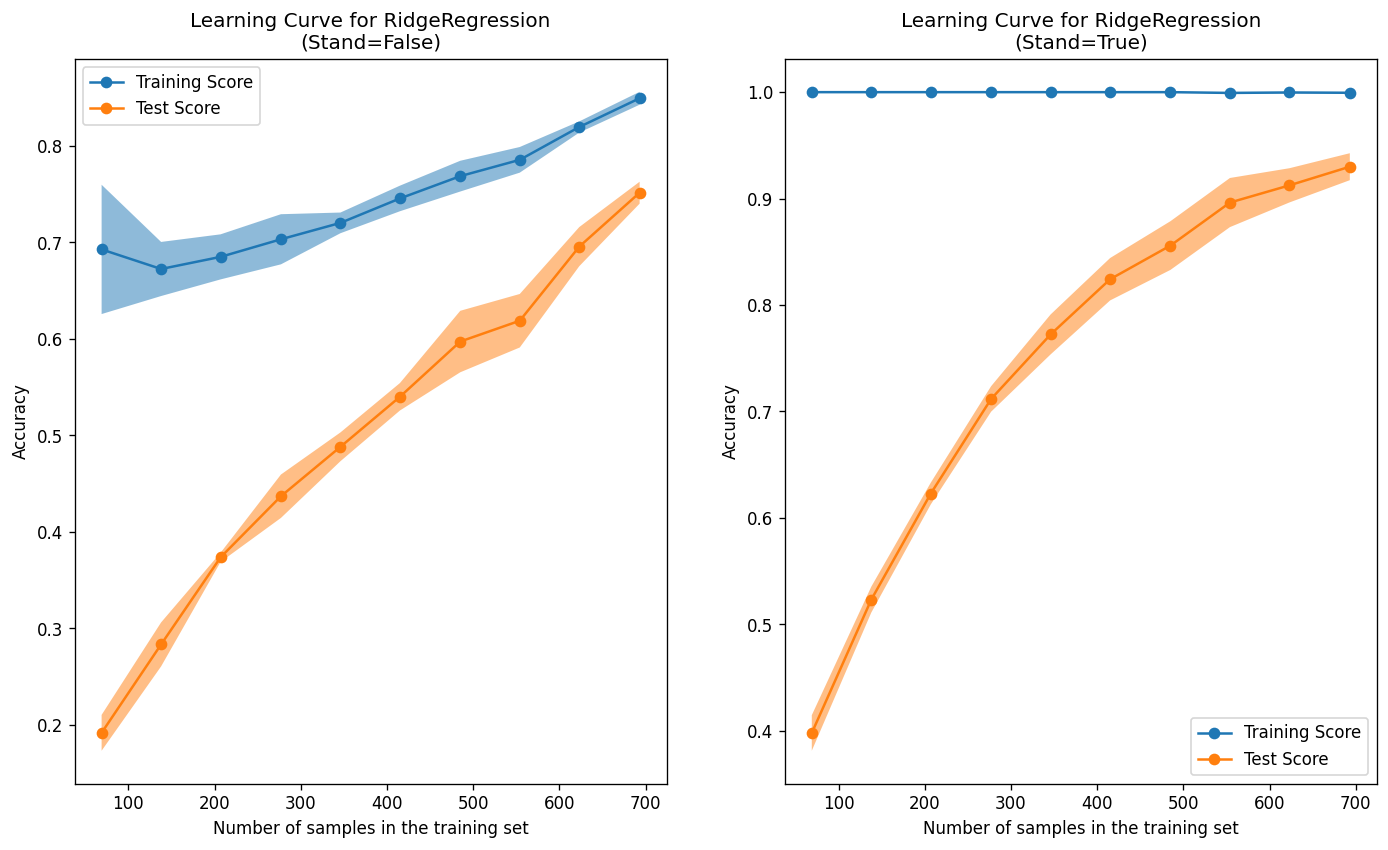

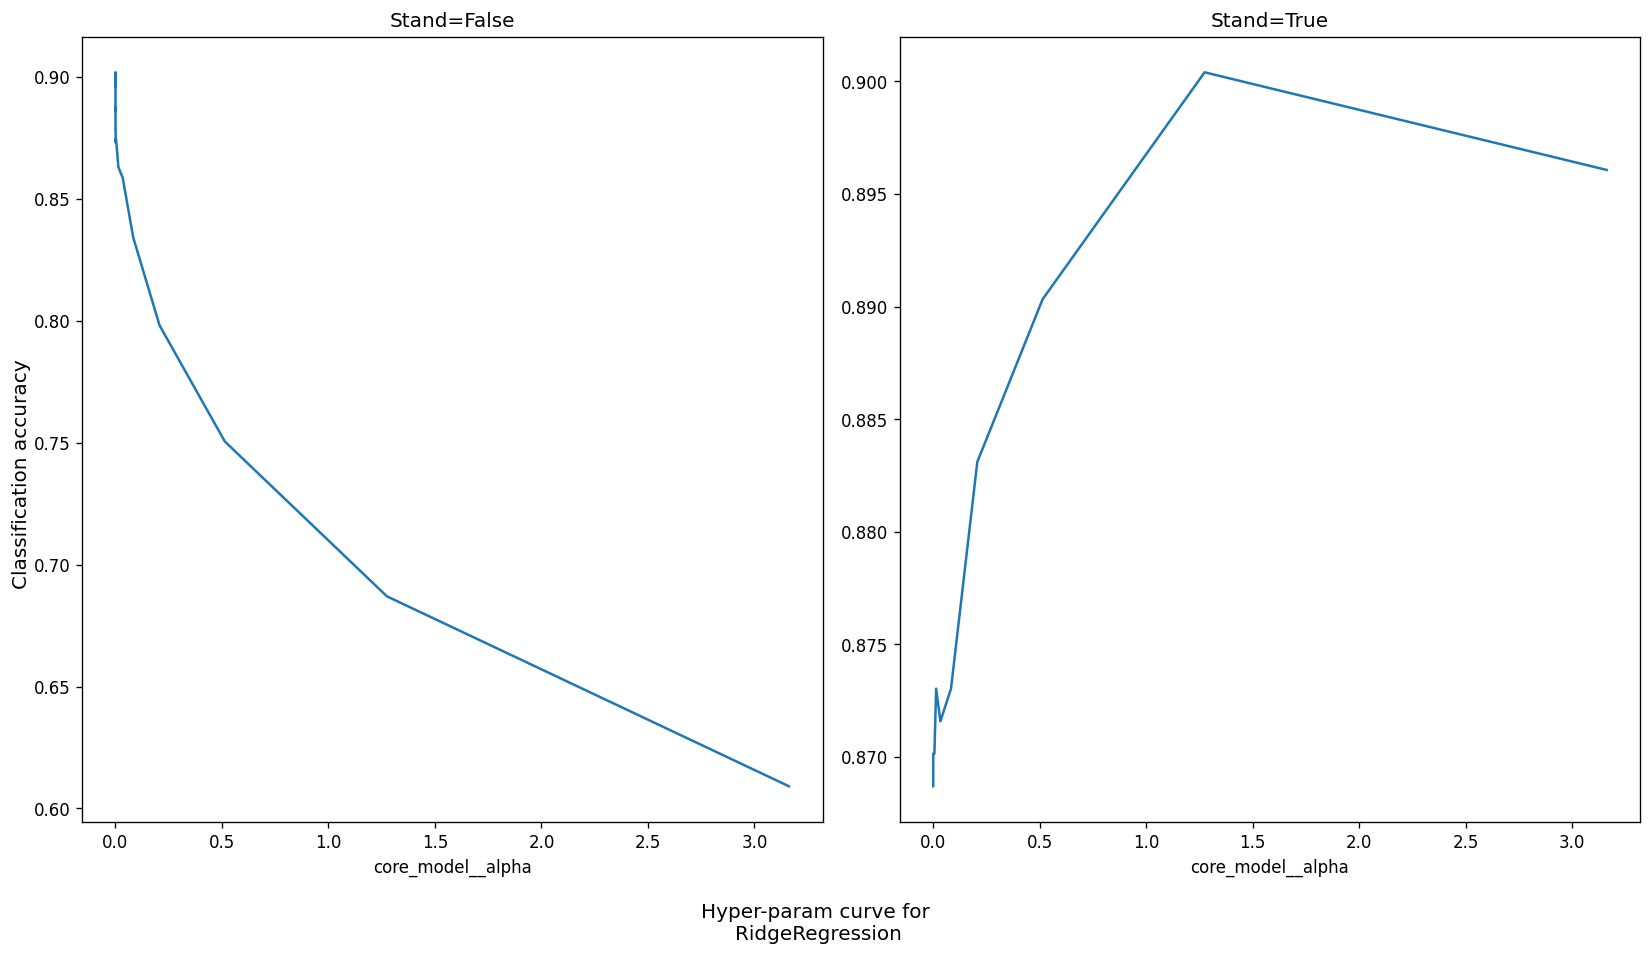

,[TRAIN] RidgeRegression (Stand=False),[TEST] RidgeRegression (Stand=False),[TRAIN] RidgeRegression (Stand=True),[TEST] RidgeRegression (Stand=True)
Accuracy,0.9942279942279942,0.9158249158249159,1.0,0.9090909090909091
Precision,0.9942279942279942,0.9158249158249159,1.0,0.9090909090909091
Recall,0.9942279942279942,0.9158249158249159,1.0,0.9090909090909091
F1 Score,0.9942279942279942,0.9158249158249159,1.0,0.9090909090909091
ROC AUC,Not Applicable,Not Applicable,Not Applicable,Not Applicable
Log loss,Not Applicable,Not Applicable,Not Applicable,Not Applicable


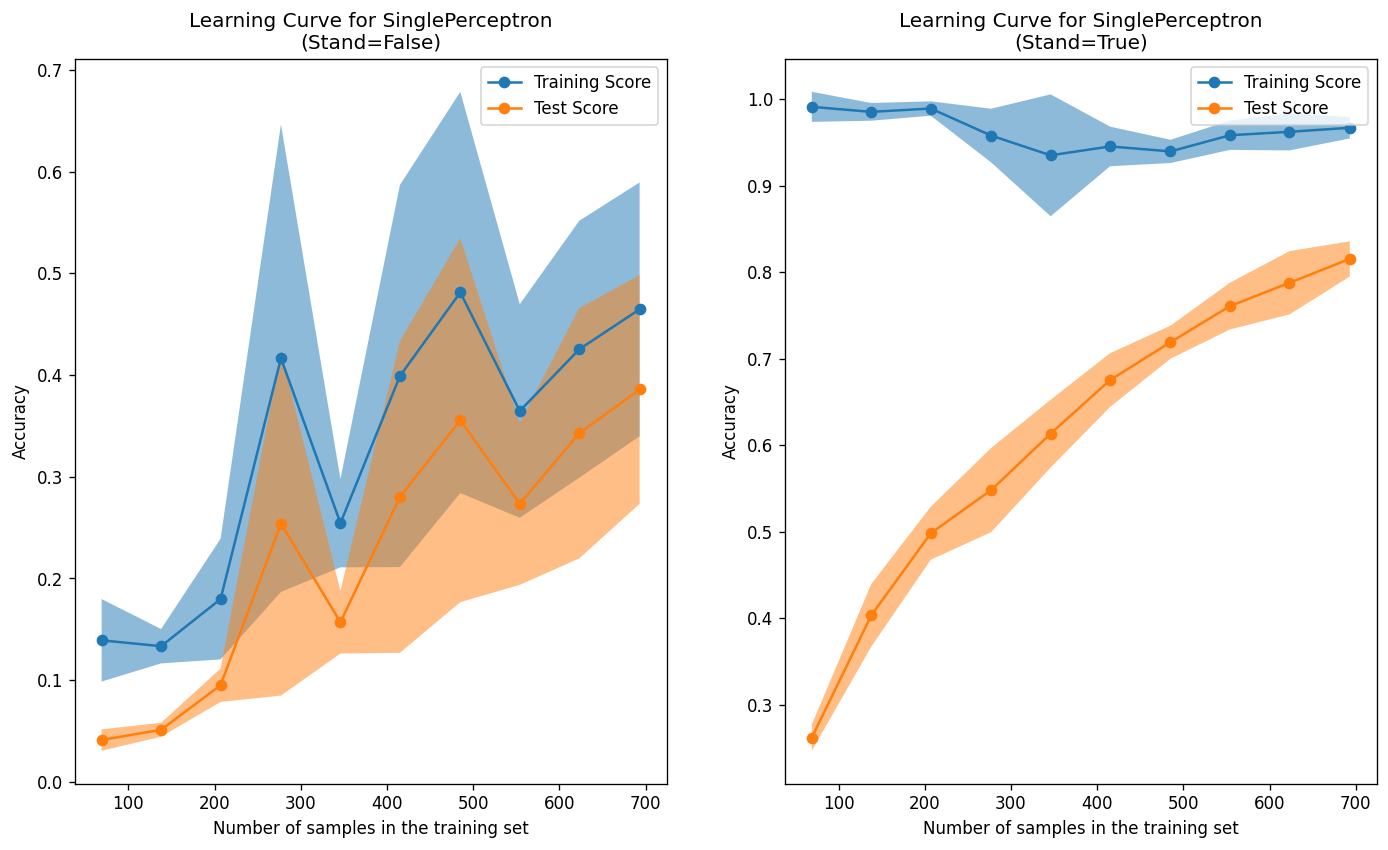

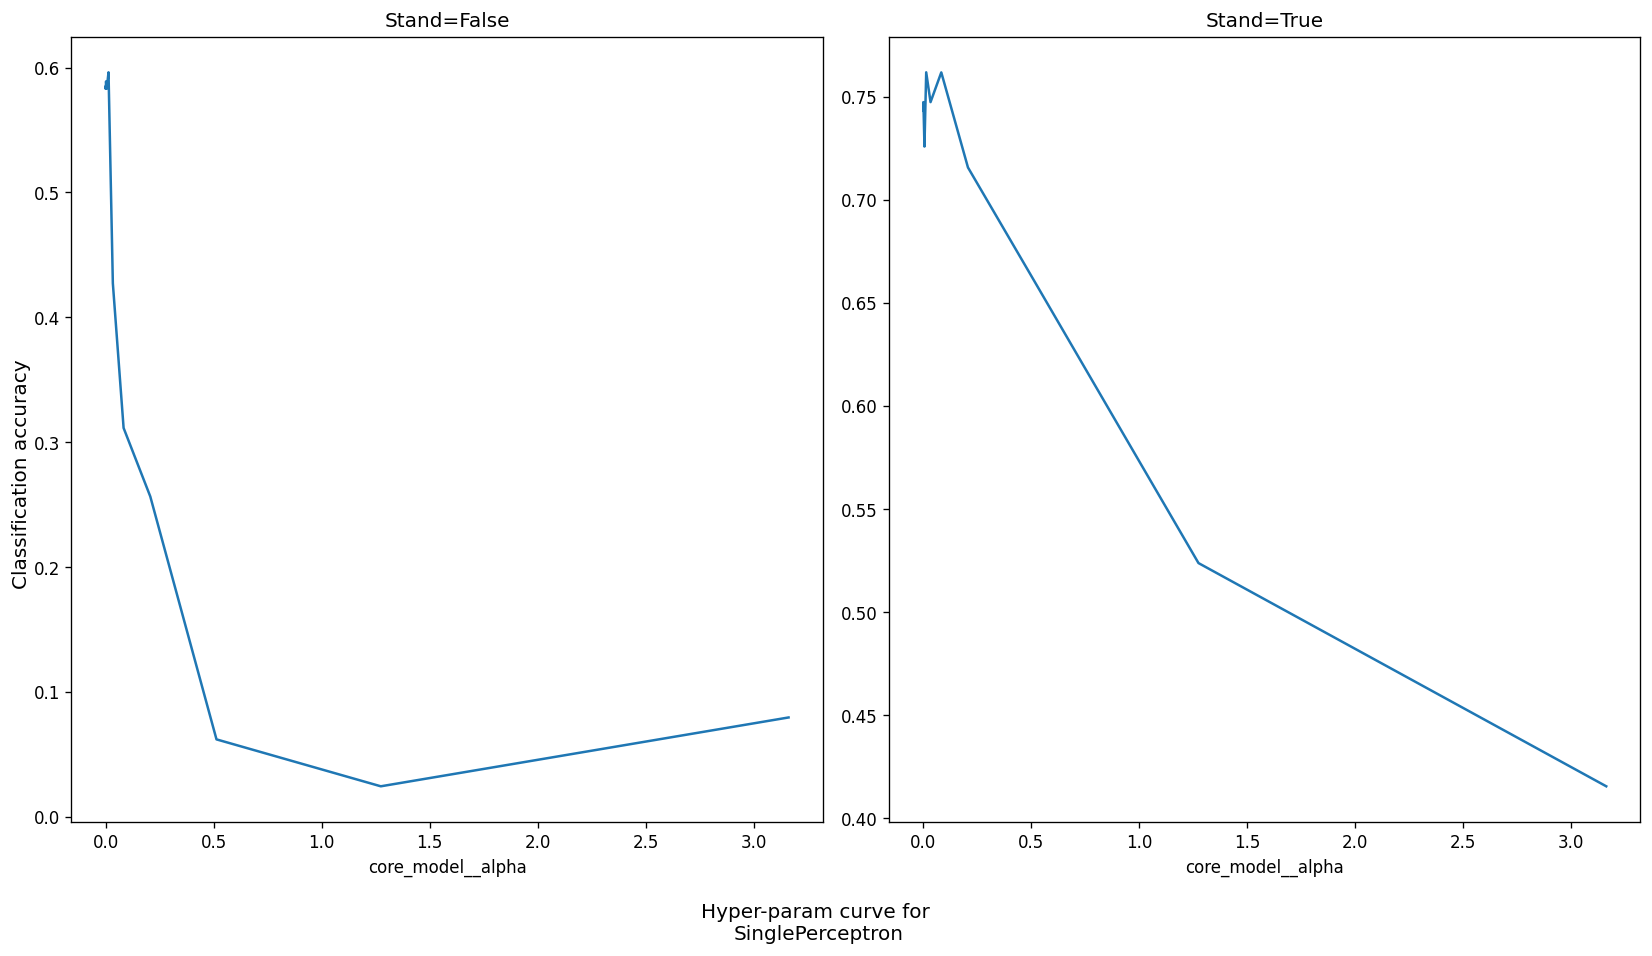

,[TRAIN] SinglePerceptron (Stand=False),[TEST] SinglePerceptron (Stand=False),[TRAIN] SinglePerceptron (Stand=True),[TEST] SinglePerceptron (Stand=True)
Accuracy,0.7965367965367965,0.696969696969697,0.976911976911977,0.8316498316498316
Precision,0.7965367965367965,0.696969696969697,0.976911976911977,0.8316498316498316
Recall,0.7965367965367965,0.696969696969697,0.976911976911977,0.8316498316498316
F1 Score,0.7965367965367965,0.696969696969697,0.976911976911977,0.8316498316498315
ROC AUC,Not Applicable,Not Applicable,Not Applicable,Not Applicable
Log loss,Not Applicable,Not Applicable,Not Applicable,Not Applicable


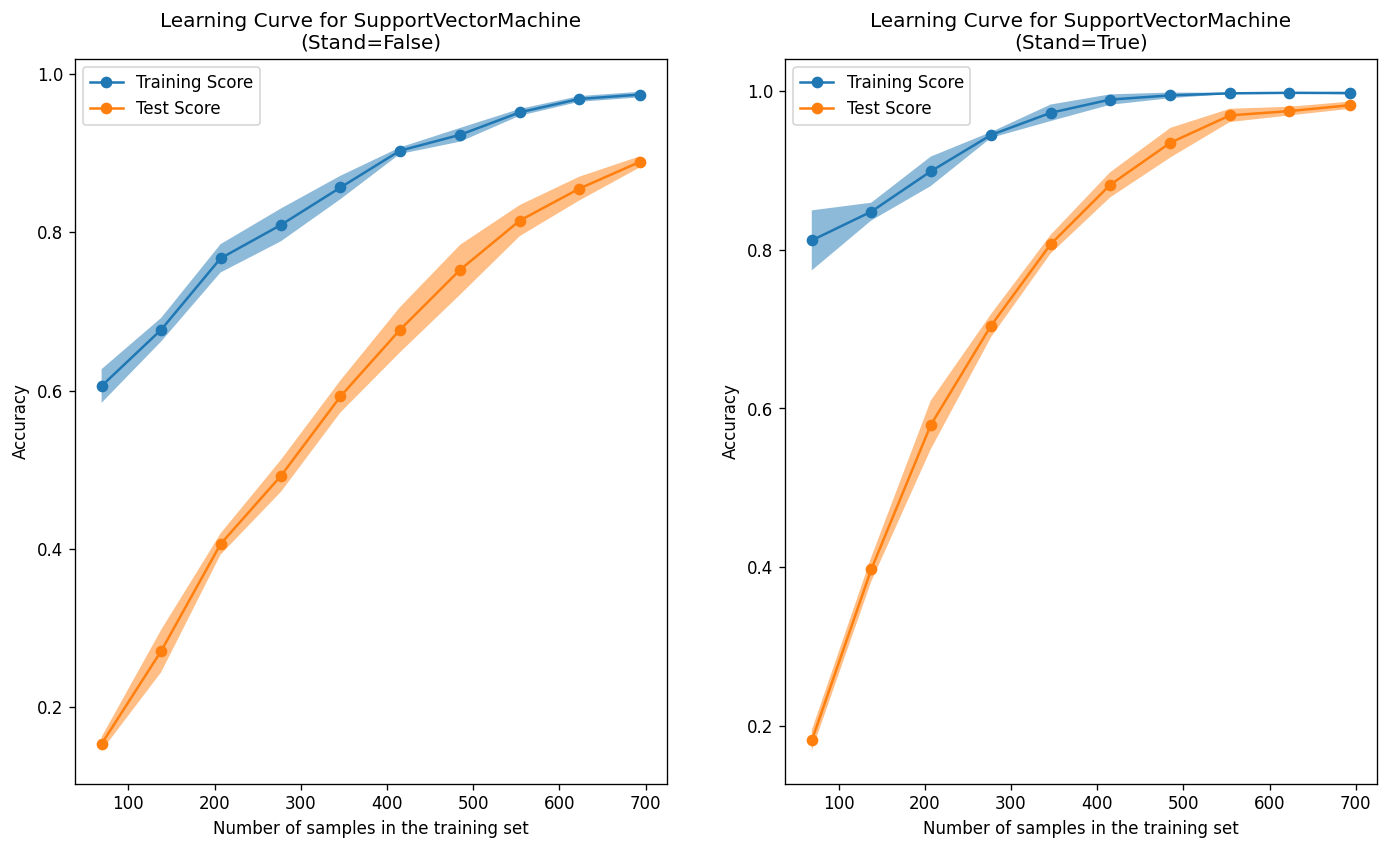

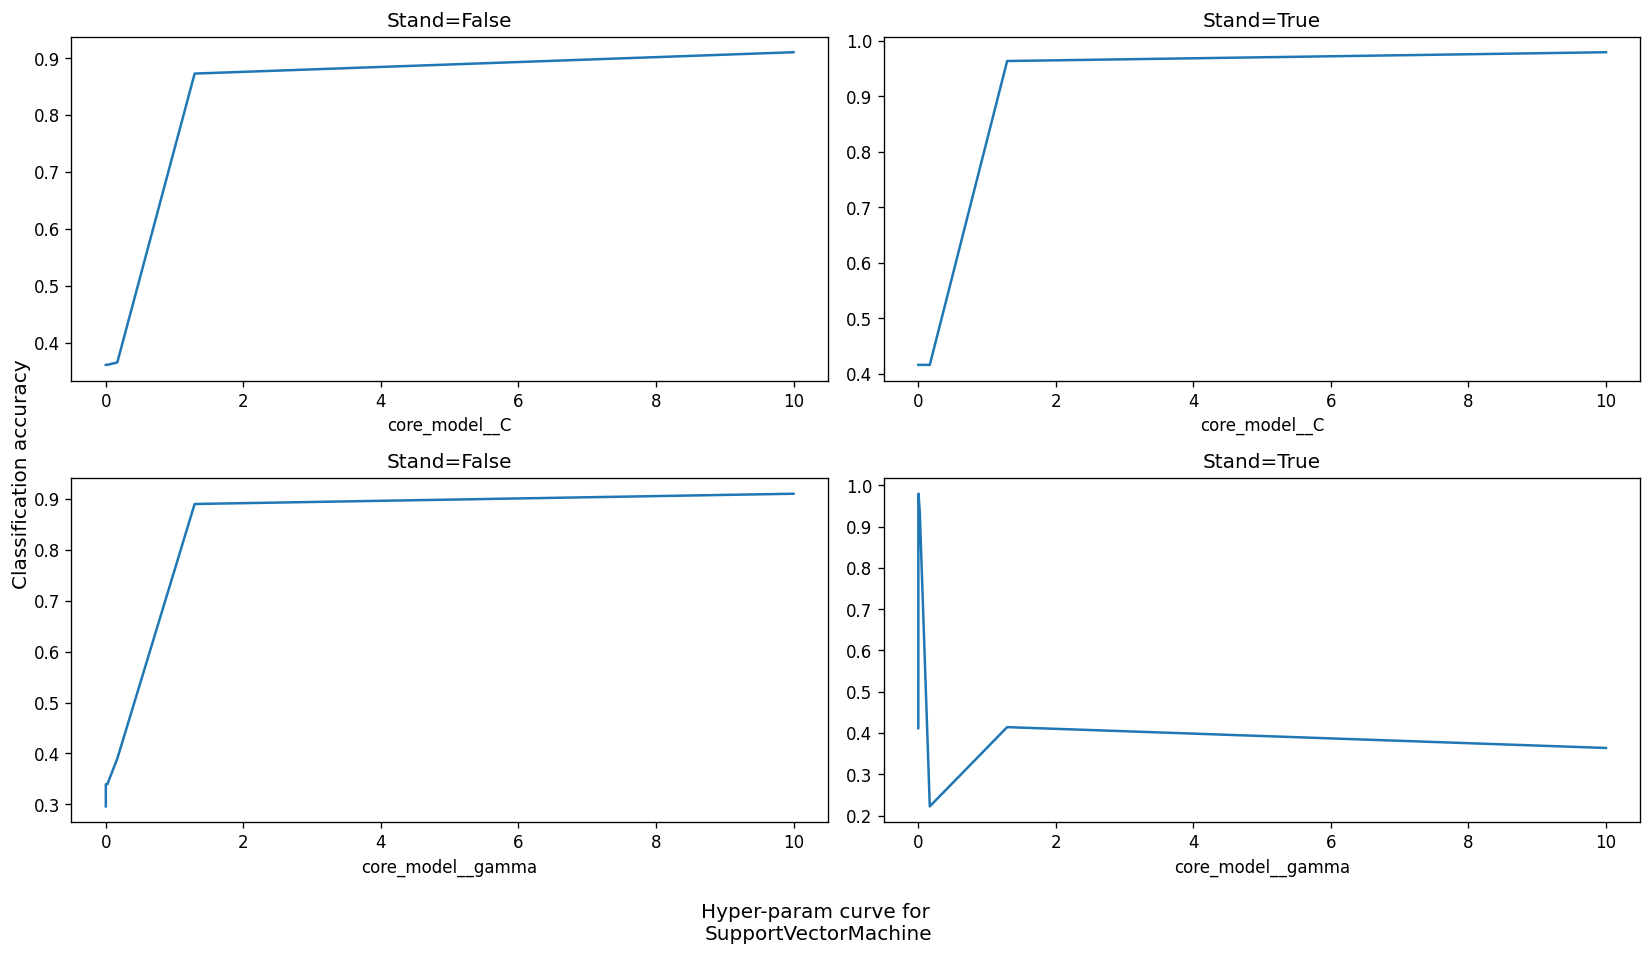

,[TRAIN] SupportVectorMachine (Stand=False),[TEST] SupportVectorMachine (Stand=False),[TRAIN] SupportVectorMachine (Stand=True),[TEST] SupportVectorMachine (Stand=True)
Accuracy,1.000000,0.912458,1.000000,0.983165
Precision,1.000000,0.912458,1.000000,0.983165
Recall,1.000000,0.912458,1.000000,0.983165
F1 Score,1.000000,0.912458,1.000000,0.983165
ROC AUC,1.000000,0.997916,1.000000,0.999725
Log loss,2.177279,2.471985,2.312516,2.489281


In [5]:
# Logistic Regression :
mt = ModelTester("LogisticClassifier")
mt.test(dataset, train_set, test_set)

# Ridge Regression : 
mt = ModelTester("RidgeRegression")
mt.test(dataset, train_set, test_set)

# Perceptron : 
mt = ModelTester("SinglePerceptron")
mt.test(dataset, train_set, test_set)

# SVM : 
mt = ModelTester("SupportVectorMachine")
mt.test(dataset, train_set, test_set)

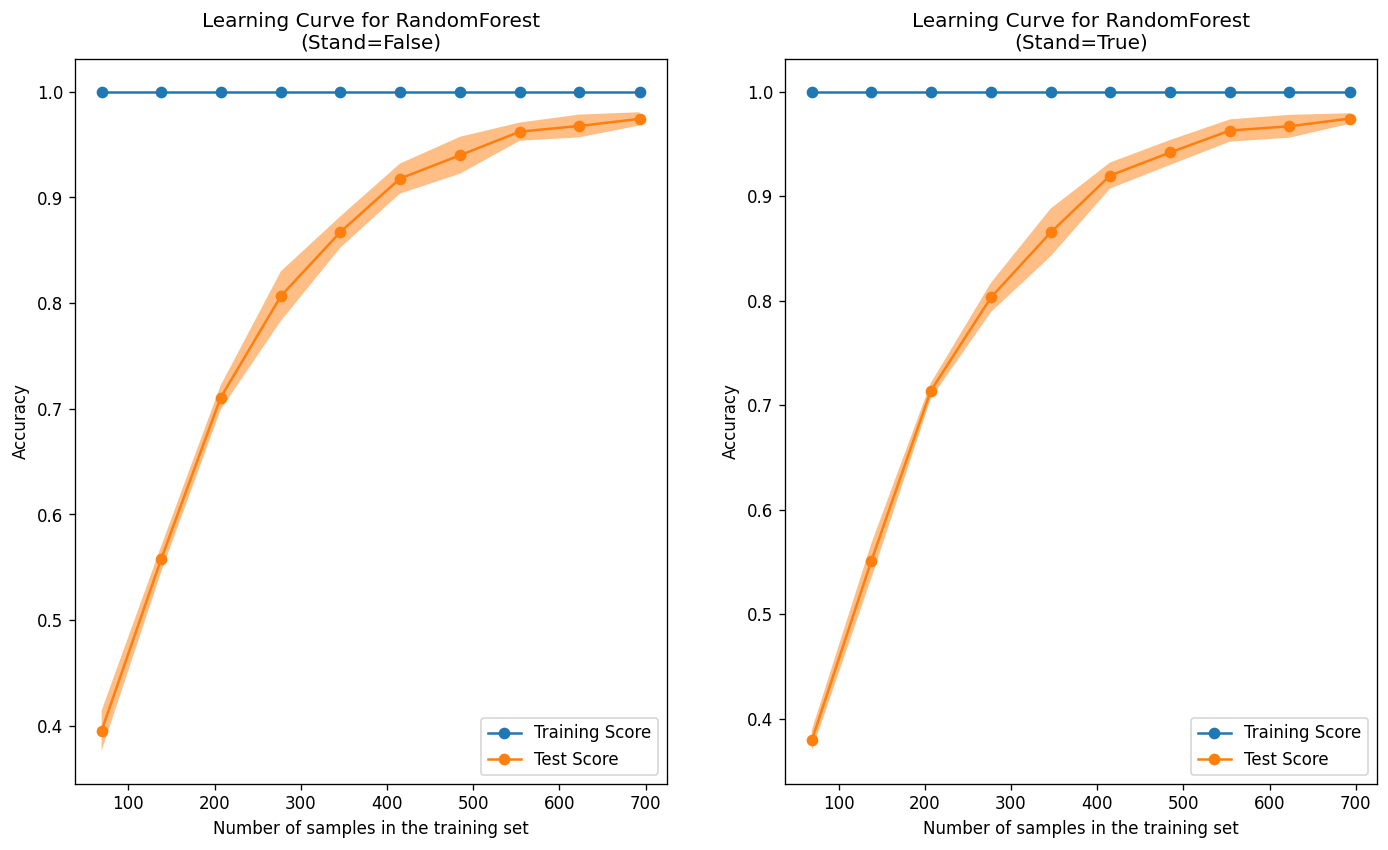

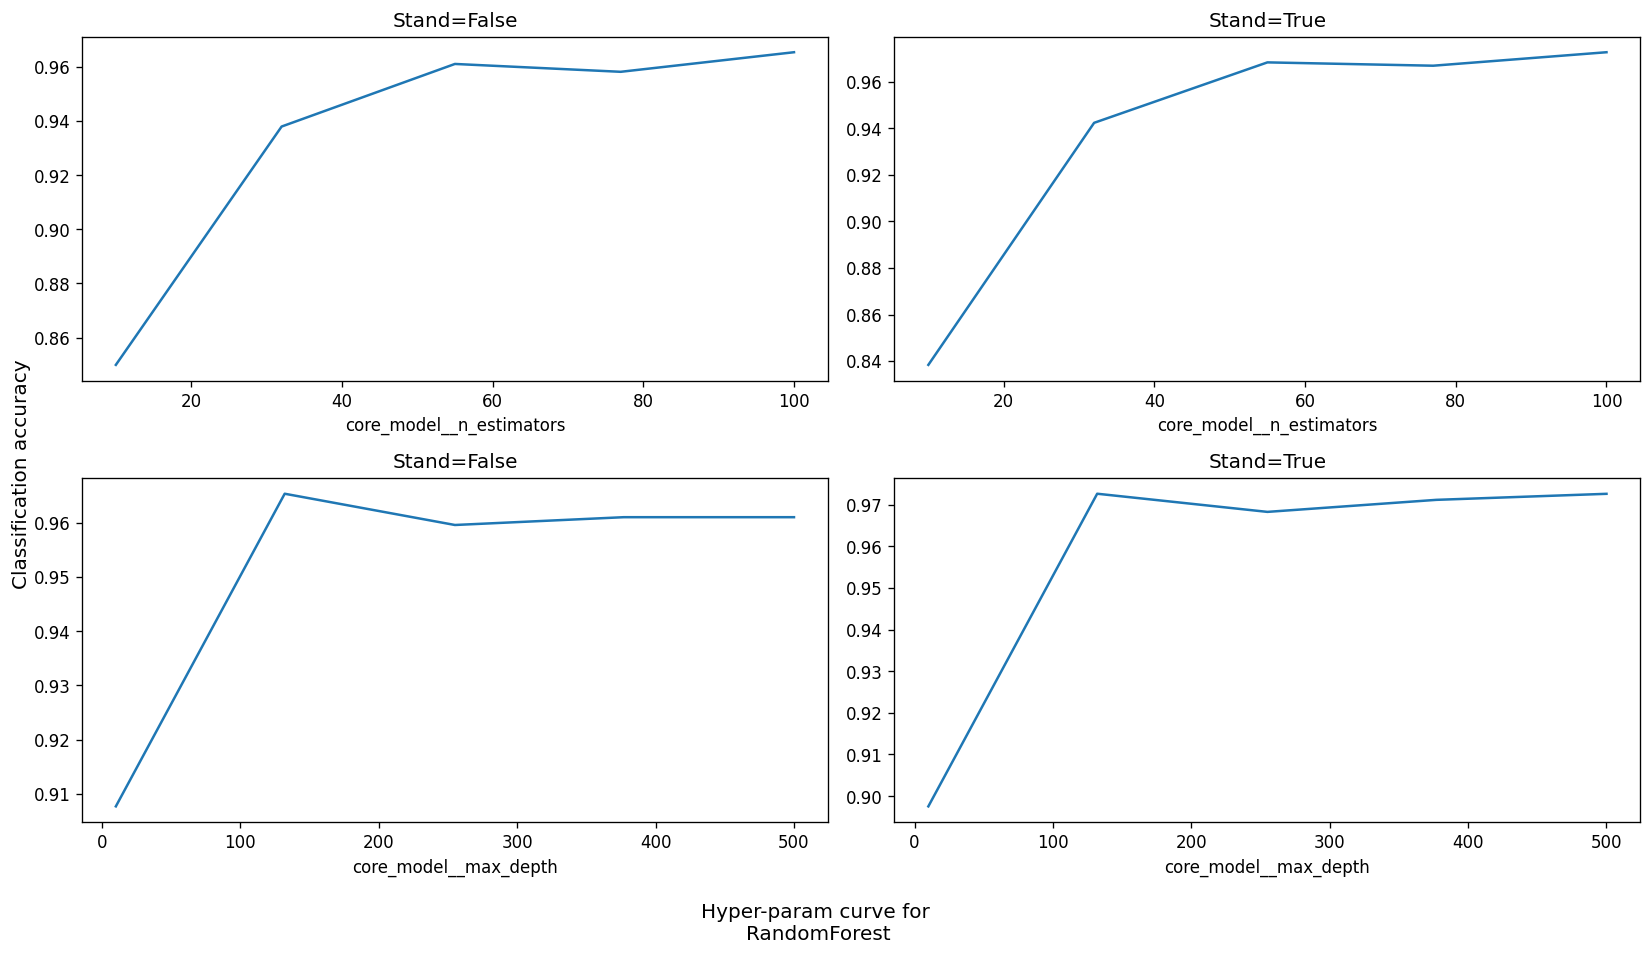

,[TRAIN] RandomForest (Stand=False),[TEST] RandomForest (Stand=False),[TRAIN] RandomForest (Stand=True),[TEST] RandomForest (Stand=True)
Accuracy,1.000000,0.983165,1.000000,0.966330
Precision,1.000000,0.983165,1.000000,0.966330
Recall,1.000000,0.983165,1.000000,0.966330
F1 Score,1.000000,0.983165,1.000000,0.966330
ROC AUC,1.000000,0.999885,1.000000,0.999857
Log loss,0.235813,0.825899,0.238562,0.827714


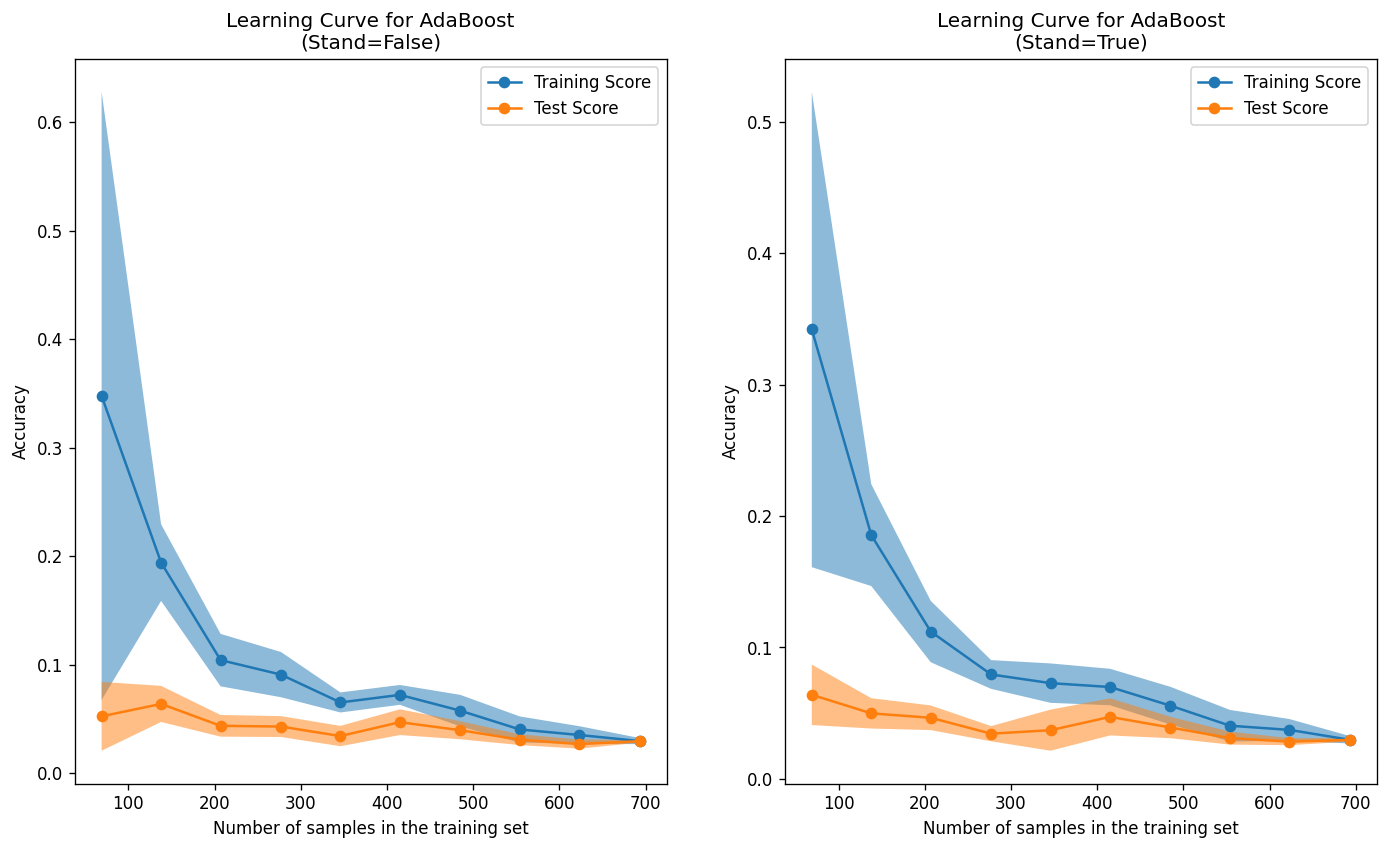

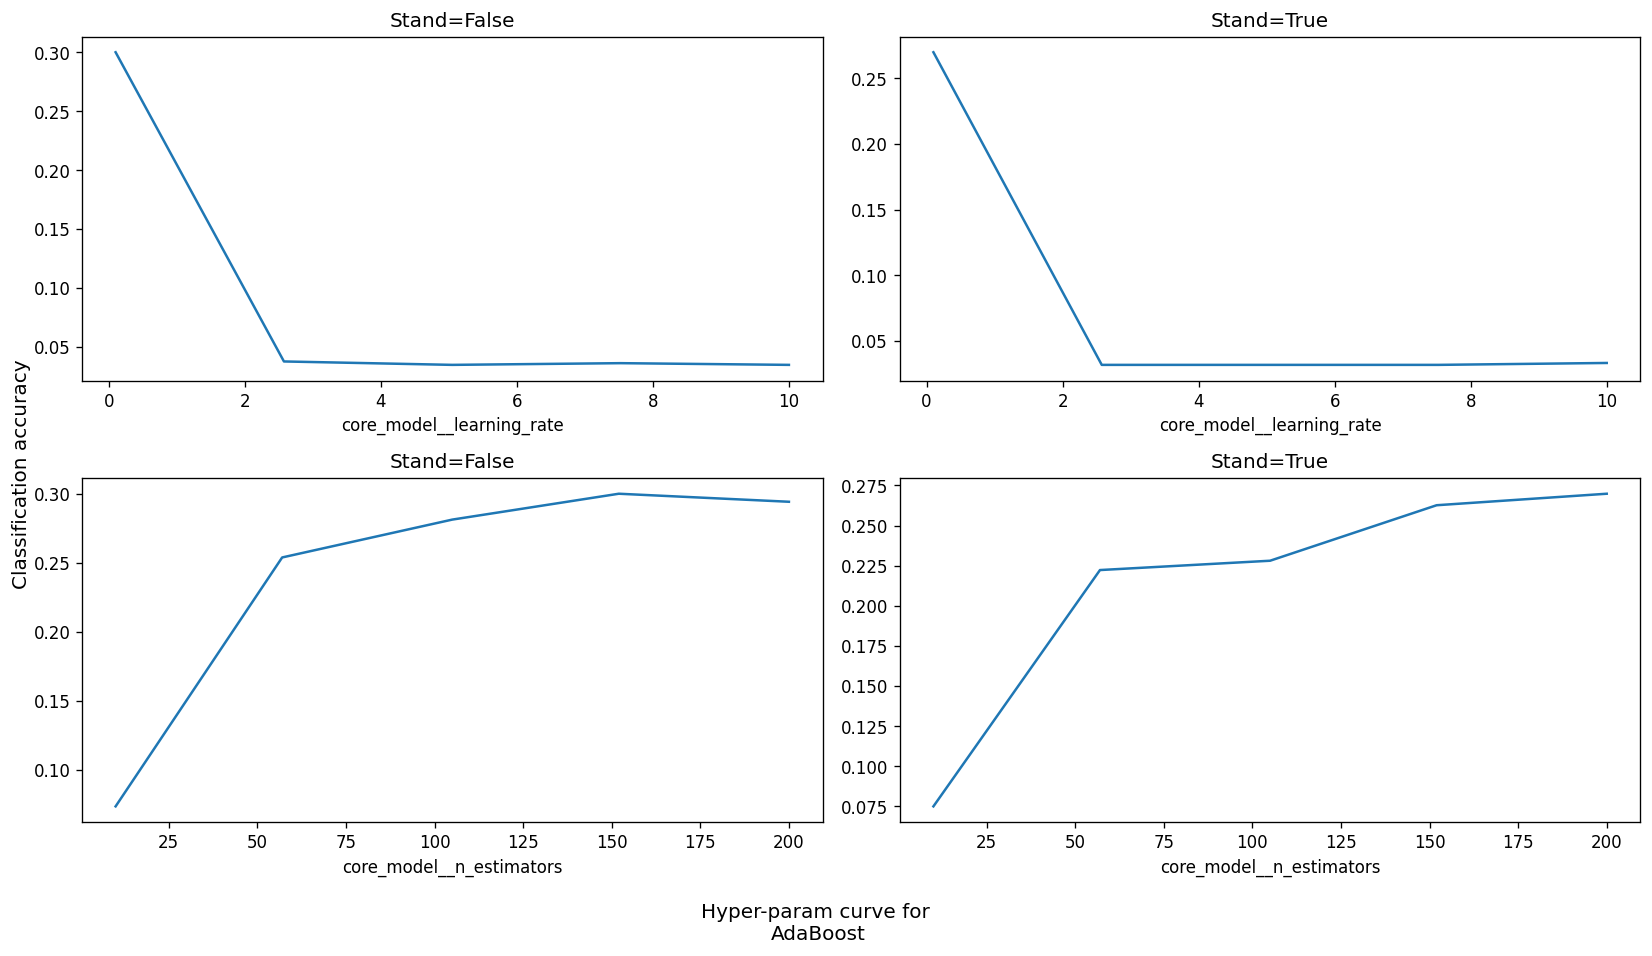

,[TRAIN] AdaBoost (Stand=False),[TEST] AdaBoost (Stand=False),[TRAIN] AdaBoost (Stand=True),[TEST] AdaBoost (Stand=True)
Accuracy,0.373737,0.255892,0.481962,0.404040
Precision,0.373737,0.255892,0.481962,0.404040
Recall,0.373737,0.255892,0.481962,0.404040
F1 Score,0.373737,0.255892,0.481962,0.404040
ROC AUC,0.981756,0.966708,0.982223,0.965345
Log loss,3.054852,3.241178,3.251129,3.445408


In [6]:
# Random Forest
mt = ModelTester("RandomForest")
mt.test(dataset, train_set, test_set)

# Ada Boost
mt = ModelTester("AdaBoost")
mt.test(dataset, train_set, test_set)

# Gradient Boosted Trees
# mt = ModelTester("GradientBoostedTrees")
# mt.test(dataset, train_set, test_set)

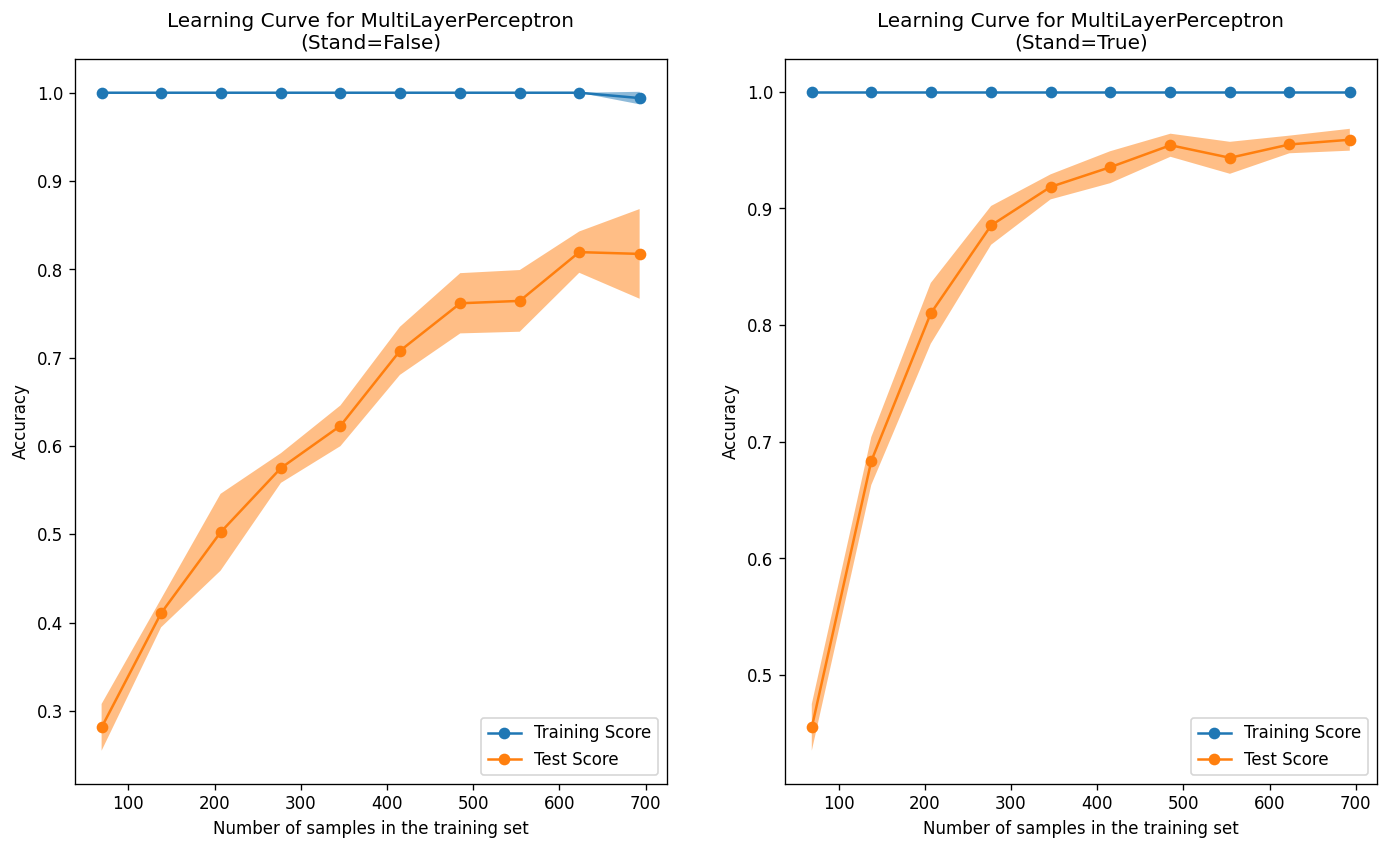

d:\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


,[TRAIN] MultiLayerPerceptron (Stand=False),[TEST] MultiLayerPerceptron (Stand=False),[TRAIN] MultiLayerPerceptron (Stand=True),[TEST] MultiLayerPerceptron (Stand=True)
Accuracy,1.000000,0.851852,1.000000,0.956229
Precision,1.000000,0.851852,1.000000,0.956229
Recall,1.000000,0.851852,1.000000,0.956229
F1 Score,1.000000,0.851852,1.000000,0.956229
ROC AUC,1.000000,0.997320,1.000000,0.999679
Log loss,0.000832,1.717717,0.000062,0.189271


In [7]:
mt = ModelTester("MultiLayerPerceptron")
mt.test(dataset, train_set, test_set)

In [8]:
from models.Models import *

# Load Test Data
test_dl = DataLoader("data/test.csv", class_col_name="id")
test_dl.load()
submission_set = test_dl.get_dataset()

In [9]:
# Best out of all
lc = LogisticClassifier(stand_trans=True)
lc.train(dataset)
probs, classes = lc.predict_probs(submission_set.features)

df = pd.DataFrame(
    data=probs,
    columns=dl.classes,
    index=test_dl.classes
)
display(df)
df.to_csv("submissions/logi_submission.csv", index_label="id")

,Acer_Opalus,Pterocarya_Stenoptera,Quercus_Hartwissiana,Tilia_Tomentosa,Quercus_Variabilis,Magnolia_Salicifolia,Quercus_Canariensis,Quercus_Rubra,Quercus_Brantii,Salix_Fragilis,...,Quercus_Ellipsoidalis,Quercus_x_Hispanica,Quercus_Shumardii,Quercus_Rhysophylla,Castanea_Sativa,Ulmus_Bergmanniana,Quercus_Nigra,Salix_Intergra,Quercus_Infectoria_sub,Sorbus_Aria
4,0.001660,0.000657,0.000793,0.000059,0.012811,0.000001,0.001142,0.016901,0.002209,0.000004,...,0.000092,0.000007,0.001233,0.000813,0.000026,0.000017,0.000050,0.000283,0.000180,0.000187
7,0.009211,0.000066,0.000225,0.006943,0.002334,0.002440,0.000936,0.000295,0.001232,0.000709,...,0.001666,0.002874,0.000242,0.000338,0.004463,0.000640,0.000020,0.001657,0.001648,0.000065
9,0.001813,0.001914,0.000892,0.001236,0.001811,0.000166,0.001150,0.001057,0.001973,0.001127,...,0.000527,0.000353,0.000585,0.000586,0.004123,0.002162,0.000193,0.000227,0.000109,0.000616
12,0.001035,0.000125,0.000438,0.004552,0.000492,0.000202,0.000455,0.000378,0.000428,0.001714,...,0.002065,0.000881,0.000935,0.001137,0.698333,0.038622,0.000031,0.000203,0.000180,0.000635
13,0.000118,0.004962,0.000070,0.003094,0.000157,0.000012,0.000251,0.000418,0.000456,0.001044,...,0.000588,0.000125,0.000878,0.000661,0.000179,0.012380,0.000152,0.000053,0.000041,0.002300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,0.001061,0.001518,0.000603,0.001089,0.001745,0.000179,0.000908,0.000463,0.000755,0.000775,...,0.000314,0.000203,0.000387,0.000375,0.002110,0.003976,0.000128,0.000343,0.000077,0.000691
1577,0.007020,0.002116,0.006148,0.019247,0.002813,0.000039,0.009194,0.000206,0.022508,0.001026,...,0.000239,0.003193,0.001167,0.000695,0.004114,0.004490,0.000499,0.000503,0.000851,0.010640
1579,0.000121,0.000936,0.034782,0.000012,0.000714,0.000007,0.853405,0.000702,0.007956,0.000011,...,0.000072,0.001019,0.002739,0.000298,0.000112,0.000024,0.007880,0.000036,0.001485,0.000580
1580,0.001073,0.000384,0.000061,0.000627,0.000086,0.000247,0.000027,0.000007,0.000051,0.000651,...,0.000212,0.003137,0.000034,0.000049,0.020839,0.000132,0.000029,0.002008,0.000793,0.000029


In [10]:
# 2nd best
mlp = MultiLayerPerceptron(stand_trans=True)
mlp.train(dataset)
probs, classes = mlp.predict_probs(submission_set.features)

df = pd.DataFrame(
    data=probs,
    columns=dl.classes,
    index=test_dl.classes
)
display(df)
df.to_csv("submissions/mlp_submission.csv", index_label="id")

,Acer_Opalus,Pterocarya_Stenoptera,Quercus_Hartwissiana,Tilia_Tomentosa,Quercus_Variabilis,Magnolia_Salicifolia,Quercus_Canariensis,Quercus_Rubra,Quercus_Brantii,Salix_Fragilis,...,Quercus_Ellipsoidalis,Quercus_x_Hispanica,Quercus_Shumardii,Quercus_Rhysophylla,Castanea_Sativa,Ulmus_Bergmanniana,Quercus_Nigra,Salix_Intergra,Quercus_Infectoria_sub,Sorbus_Aria
4,4.666175e-29,5.103339e-25,2.530079e-20,6.308016e-34,2.103636e-20,8.953670e-44,4.990950e-25,1.793899e-13,1.650062e-22,1.967607e-40,...,4.024745e-40,1.566452e-40,4.119178e-29,5.839225e-22,2.762291e-41,9.971008e-35,2.397187e-27,2.384913e-38,1.352920e-27,8.219798e-27
7,2.754106e-11,4.277204e-27,1.971301e-32,2.939743e-16,1.668267e-11,1.623700e-12,1.078052e-23,1.660634e-34,1.445169e-29,4.560055e-24,...,7.333412e-20,8.711579e-20,6.305785e-38,1.463556e-33,4.644836e-10,6.928982e-22,3.430487e-37,3.145462e-23,1.804190e-20,2.902295e-31
9,2.961882e-33,1.999767e-21,5.232303e-28,1.284343e-23,2.853036e-24,1.702779e-35,4.210585e-19,1.960460e-24,1.211790e-24,1.759662e-26,...,2.393503e-30,9.939004e-37,7.920781e-28,7.003041e-37,7.440878e-26,2.547174e-19,2.421113e-35,3.338379e-41,1.968804e-34,2.363058e-21
12,2.268992e-26,1.019000e-15,7.176905e-40,4.947286e-08,2.283114e-21,1.137969e-31,1.044835e-24,1.765435e-32,1.848121e-29,1.266528e-14,...,4.059749e-19,3.662140e-32,9.941710e-31,4.005553e-38,1.479408e-01,8.125880e-01,4.185485e-41,6.231390e-45,7.716319e-42,4.101374e-15
13,6.952855e-40,7.969229e-10,2.332423e-41,2.028417e-23,1.891157e-35,2.444433e-49,8.580701e-32,8.130657e-29,1.562418e-26,1.355292e-30,...,6.103529e-30,4.906134e-40,1.078396e-28,9.748831e-44,7.729960e-34,4.337977e-14,6.581531e-40,9.439708e-52,2.722419e-45,1.048308e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,1.248948e-31,7.888359e-21,2.144645e-28,2.655685e-21,2.227503e-23,4.962956e-35,2.551168e-20,2.032308e-25,2.445878e-26,8.615088e-25,...,3.345871e-30,3.710531e-36,1.096768e-30,1.386942e-37,1.144543e-24,9.862193e-16,1.188945e-37,2.226578e-38,1.555759e-33,5.411537e-21
1577,1.340984e-15,7.880526e-13,7.292091e-18,1.109404e-06,5.620363e-23,2.064602e-32,2.070395e-16,7.783278e-30,6.010744e-13,3.256284e-19,...,8.734074e-25,2.038142e-19,2.841963e-23,3.990737e-35,8.776166e-19,1.067712e-13,7.912323e-29,8.183299e-33,7.758165e-23,1.033238e-07
1579,1.437032e-28,1.240795e-20,8.906895e-05,1.122960e-29,2.222480e-22,9.552826e-36,9.999107e-01,6.839324e-14,2.471995e-13,9.386754e-34,...,1.368480e-25,7.157287e-28,2.600977e-13,1.787948e-28,3.830488e-32,8.751393e-31,4.361429e-11,7.602844e-33,2.449373e-24,7.848490e-20
1580,1.004683e-17,1.057738e-27,5.445874e-41,1.048206e-26,7.208960e-29,1.260786e-28,3.344307e-38,1.073473e-49,2.358993e-43,2.696441e-21,...,1.061659e-41,2.596414e-17,6.253147e-53,4.893519e-34,9.506128e-16,1.891995e-26,7.107949e-48,1.792671e-21,2.249274e-20,2.107106e-31


In [11]:
# 3rd best
svm = SupportVectorMachine(stand_trans=True)
svm.train(dataset)
probs, classes = svm.predict_probs(submission_set.features)

df = pd.DataFrame(
    data=probs,
    columns=dl.classes,
    index=test_dl.classes
)
display(df)
df.to_csv("submissions/svm_submission.csv", index_label="id")

,Acer_Opalus,Pterocarya_Stenoptera,Quercus_Hartwissiana,Tilia_Tomentosa,Quercus_Variabilis,Magnolia_Salicifolia,Quercus_Canariensis,Quercus_Rubra,Quercus_Brantii,Salix_Fragilis,...,Quercus_Ellipsoidalis,Quercus_x_Hispanica,Quercus_Shumardii,Quercus_Rhysophylla,Castanea_Sativa,Ulmus_Bergmanniana,Quercus_Nigra,Salix_Intergra,Quercus_Infectoria_sub,Sorbus_Aria
4,0.007413,0.009586,0.009743,0.005653,0.021580,0.003366,0.012040,0.024179,0.010376,0.004062,...,0.005065,0.004691,0.008672,0.009841,0.004542,0.004787,0.005962,0.005597,0.009802,0.005975
7,0.029938,0.004747,0.006237,0.016606,0.010717,0.011147,0.008126,0.003679,0.007178,0.005716,...,0.007870,0.014120,0.005605,0.004763,0.015965,0.006698,0.003590,0.009892,0.015972,0.004021
9,0.011749,0.014088,0.010633,0.012617,0.010561,0.004544,0.012033,0.005667,0.011463,0.006916,...,0.005078,0.008531,0.007846,0.006268,0.011339,0.012826,0.005422,0.004584,0.008419,0.006797
12,0.012710,0.008042,0.007720,0.021166,0.007439,0.005151,0.008004,0.004511,0.007995,0.009678,...,0.008448,0.010073,0.008791,0.006829,0.092611,0.026986,0.004432,0.005044,0.008454,0.008292
13,0.008063,0.023668,0.006773,0.016263,0.006575,0.003488,0.008159,0.005330,0.008475,0.010008,...,0.006832,0.007447,0.010975,0.007465,0.007914,0.027978,0.006092,0.004210,0.006695,0.012367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,0.011946,0.014031,0.010531,0.013705,0.010995,0.004857,0.011723,0.004962,0.009581,0.007158,...,0.004874,0.008219,0.007205,0.006194,0.010692,0.016444,0.005238,0.005218,0.008338,0.007502
1577,0.016373,0.013066,0.015334,0.024794,0.009007,0.003201,0.015944,0.003399,0.021587,0.006345,...,0.003822,0.013365,0.007157,0.005324,0.010568,0.013398,0.005385,0.004694,0.009830,0.014128
1579,0.007098,0.010302,0.038633,0.004468,0.009482,0.003461,0.123951,0.006903,0.020510,0.003229,...,0.004258,0.012133,0.012255,0.006047,0.004705,0.003992,0.018965,0.004120,0.016440,0.006698
1580,0.014824,0.012041,0.006896,0.010739,0.007608,0.007525,0.006716,0.004672,0.006239,0.009991,...,0.007429,0.016896,0.006330,0.005633,0.021344,0.007324,0.005874,0.011472,0.015775,0.006370


In [12]:
rf = RandomForest(stand_trans=True)
rf.train(dataset)
probs, classes = rf.predict_probs(submission_set.features)

df = pd.DataFrame(
    data=probs,
    columns=dl.classes,
    index=test_dl.classes
)
display(df)
df.to_csv("submissions/rf_submission.csv", index_label="id")

,Acer_Opalus,Pterocarya_Stenoptera,Quercus_Hartwissiana,Tilia_Tomentosa,Quercus_Variabilis,Magnolia_Salicifolia,Quercus_Canariensis,Quercus_Rubra,Quercus_Brantii,Salix_Fragilis,...,Quercus_Ellipsoidalis,Quercus_x_Hispanica,Quercus_Shumardii,Quercus_Rhysophylla,Castanea_Sativa,Ulmus_Bergmanniana,Quercus_Nigra,Salix_Intergra,Quercus_Infectoria_sub,Sorbus_Aria
4,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.02,0.00,0.00,...,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.01,0.00
7,0.02,0.00,0.01,0.02,0.00,0.01,0.00,0.00,0.00,0.01,...,0.00,0.01,0.0,0.0,0.03,0.01,0.00,0.03,0.00,0.00
9,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.01
12,0.05,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.01,0.01,...,0.02,0.00,0.0,0.0,0.19,0.06,0.00,0.01,0.01,0.00
13,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.0,0.00,0.02,0.00,0.00,0.00,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,0.00,0.01,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.0,0.00,0.02,0.00,0.00,0.00,0.00
1577,0.00,0.00,0.03,0.00,0.01,0.00,0.04,0.00,0.01,0.00,...,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.03
1579,0.00,0.01,0.04,0.00,0.01,0.00,0.28,0.01,0.05,0.00,...,0.00,0.00,0.0,0.0,0.00,0.00,0.03,0.00,0.00,0.01
1580,0.03,0.01,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.11,0.0,0.0,0.06,0.01,0.00,0.04,0.01,0.01


In [13]:
rr = RidgeRegression(stand_trans=True)
rr.train(dataset)
probs, classes = rr.predict_probs(submission_set.features)

df = pd.DataFrame(
    data=probs,
    columns=dl.classes,
    index=test_dl.classes
)
display(df)
df.to_csv("submissions/rr_submission.csv", index_label="id")

,Acer_Opalus,Pterocarya_Stenoptera,Quercus_Hartwissiana,Tilia_Tomentosa,Quercus_Variabilis,Magnolia_Salicifolia,Quercus_Canariensis,Quercus_Rubra,Quercus_Brantii,Salix_Fragilis,...,Quercus_Ellipsoidalis,Quercus_x_Hispanica,Quercus_Shumardii,Quercus_Rhysophylla,Castanea_Sativa,Ulmus_Bergmanniana,Quercus_Nigra,Salix_Intergra,Quercus_Infectoria_sub,Sorbus_Aria
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
sp = SinglePerceptron(stand_trans=True)
sp.train(dataset)
probs, classes = sp.predict_probs(submission_set.features)

df = pd.DataFrame(
    data=probs,
    columns=dl.classes,
    index=test_dl.classes
)
display(df)
df.to_csv("submissions/sp_submission.csv", index_label="id")

,Acer_Opalus,Pterocarya_Stenoptera,Quercus_Hartwissiana,Tilia_Tomentosa,Quercus_Variabilis,Magnolia_Salicifolia,Quercus_Canariensis,Quercus_Rubra,Quercus_Brantii,Salix_Fragilis,...,Quercus_Ellipsoidalis,Quercus_x_Hispanica,Quercus_Shumardii,Quercus_Rhysophylla,Castanea_Sativa,Ulmus_Bergmanniana,Quercus_Nigra,Salix_Intergra,Quercus_Infectoria_sub,Sorbus_Aria
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
ab = AdaBoost(stand_trans=True)
ab.train(dataset)
probs, classes = ab.predict_probs(submission_set.features)

df = pd.DataFrame(
    data=probs,
    columns=dl.classes,
    index=test_dl.classes
)
display(df)
df.to_csv("submissions/ab_submission.csv", index_label="id")

,Acer_Opalus,Pterocarya_Stenoptera,Quercus_Hartwissiana,Tilia_Tomentosa,Quercus_Variabilis,Magnolia_Salicifolia,Quercus_Canariensis,Quercus_Rubra,Quercus_Brantii,Salix_Fragilis,...,Quercus_Ellipsoidalis,Quercus_x_Hispanica,Quercus_Shumardii,Quercus_Rhysophylla,Castanea_Sativa,Ulmus_Bergmanniana,Quercus_Nigra,Salix_Intergra,Quercus_Infectoria_sub,Sorbus_Aria
4,0.005830,0.017070,0.002458,0.000568,0.018059,0.001651,0.025200,0.030336,0.003990,0.000170,...,0.006281,0.005865,0.000743,0.047847,0.000592,0.000577,0.008162,0.000512,0.035308,0.000579
7,0.021774,0.010919,0.026252,0.002477,0.004937,0.012696,0.036729,0.001444,0.032101,0.001406,...,0.009184,0.053222,0.001982,0.002094,0.034976,0.002517,0.019206,0.003023,0.070191,0.004410
9,0.011369,0.048214,0.001322,0.007686,0.038397,0.000877,0.013674,0.015998,0.002172,0.002101,...,0.003436,0.003093,0.000410,0.014810,0.001231,0.007809,0.004317,0.000282,0.018631,0.007660
12,0.029237,0.010365,0.025234,0.002810,0.004737,0.004729,0.035183,0.001658,0.030697,0.000930,...,0.008204,0.071459,0.002565,0.002007,0.046382,0.002820,0.022191,0.002541,0.081386,0.005002
13,0.023643,0.055362,0.002741,0.015801,0.029031,0.001038,0.014465,0.009144,0.002488,0.004255,...,0.006995,0.006429,0.000716,0.008376,0.002512,0.016069,0.006636,0.000579,0.021254,0.013489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,0.011369,0.048214,0.001322,0.007686,0.038397,0.000877,0.013674,0.015998,0.002172,0.002101,...,0.003436,0.003093,0.000410,0.014810,0.001231,0.007809,0.004317,0.000282,0.018631,0.007660
1577,0.013512,0.032616,0.009387,0.009437,0.017795,0.000632,0.044447,0.014127,0.028330,0.002646,...,0.004280,0.010495,0.000424,0.004962,0.021236,0.009586,0.003817,0.000360,0.034635,0.022959
1579,0.005249,0.015483,0.007546,0.000517,0.016826,0.001491,0.088902,0.019251,0.051730,0.000155,...,0.005861,0.015093,0.000680,0.025124,0.007625,0.000525,0.007371,0.000484,0.090648,0.001490
1580,0.040006,0.034783,0.011975,0.003192,0.006238,0.005241,0.014593,0.000855,0.003437,0.001038,...,0.008787,0.040253,0.003443,0.002727,0.003203,0.003203,0.035510,0.003228,0.039448,0.002765
